In [93]:
import pandas as pd 
import matplotlib.pyplot as plt
import ast

In [94]:
la_csv_text = pd.read_csv("BERT_zeroshot_labels.csv")
spokane_seattle_csv_text = pd.read_csv("BERT_zeroshot_spokane_seattle_labels.csv")

In [95]:
la_csv_text['labels'] = la_csv_text['labels'].apply(ast.literal_eval)
first_labels = la_csv_text['labels']
first_labels

0       [solution focused, fire management, wildfire, ...
1                                           [informative]
2                      [informative, fearful or panicked]
3                                           [informative]
4                                                      []
                              ...                        
2866                                        [informative]
2867                                                   []
2868                                                   []
2869                    [informative, political, blaming]
2870                             [informative, political]
Name: labels, Length: 2871, dtype: object

In [96]:
spokane_seattle_csv_text['labels'] = spokane_seattle_csv_text['labels'].apply(ast.literal_eval)
second_labels = spokane_seattle_csv_text['labels']
second_labels

0       [wildfire, political, fire management, seeking...
1         [frustration, informative, fearful or panicked]
2                                          [news focused]
3                                                      []
4                                           [informative]
                              ...                        
3753                              [wildfire, informative]
3754    [wildfire, fire management, informative, solut...
3755                                            [blaming]
3756                                                   []
3757                          [wildfire, fire management]
Name: labels, Length: 3758, dtype: object

In [100]:
import random

def shuffle_set(orig_list):
    shuffled_list = random.shuffle(orig_list)
    return shuffled_list 

def build_label_distribution(label_set):
    dist_dict = {
        "grateful": 0, 
        "political": 0, 
        "frustration": 0, 
        "solution focused": 0, 
        "informative": 0, 
        "news focused": 0, 
        "fearful or panicked": 0,
        "blaming": 0, 
        "seeking help or advice": 0, 
        "prescribed burn": 0, 
        "wildfire": 0, 
        "fire management": 0
    }
    
    for row in label_set:
        for label in row:
            dist_dict[label] += 1

    return dist_dict

def add_label_distribution(dist_dict, label_set):
    new_dict = dist_dict
    for row in label_set:
        for label in row:
            new_dict[label] += 1

    return new_dict

In [101]:
og_dict = build_label_distribution(second_labels)

In [103]:
final_dict = add_label_distribution(og_dict,first_labels)

In [104]:
def sort_dict(unsorted_dict):
    sorted_dict = dict(sorted(unsorted_dict.items(), key=lambda x: x[1], reverse=True))
    return sorted_dict

In [106]:
sorted_dict = sort_dict(final_dict)

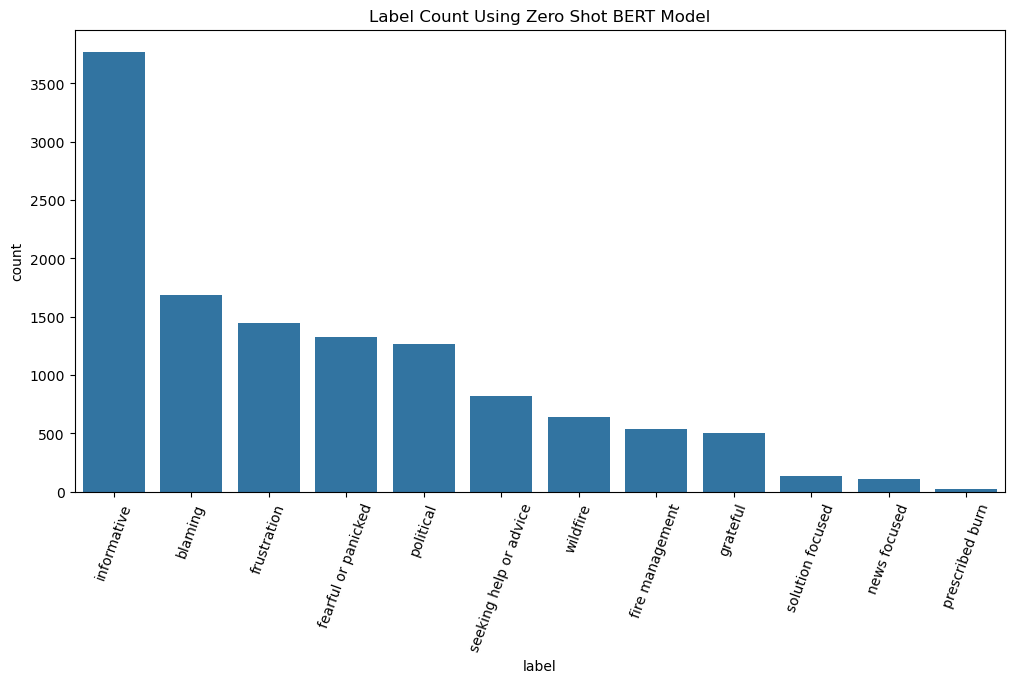

In [121]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()))
plt.xticks(rotation=70)
plt.title("Label Count Using Zero Shot BERT Model")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

In [137]:
# make the distribution percentage instead

total = sum(sorted_dict.values())
count = 0
perc_dict = {}
values = list(sorted_dict.values())

for key in sorted_dict.keys():
    perc_dict[key] = float(f"{(values[count] / total): .3f}")
    
    
    count += 1
    
perc_dict

{'informative': 0.308,
 'blaming': 0.138,
 'frustration': 0.118,
 'fearful or panicked': 0.108,
 'political': 0.103,
 'seeking help or advice': 0.067,
 'wildfire': 0.052,
 'fire management': 0.044,
 'grateful': 0.041,
 'solution focused': 0.011,
 'news focused': 0.008,
 'prescribed burn': 0.001}

In [139]:
from prettytable import PrettyTable

# print out in a table to look nice 

table = PrettyTable()
table.field_names = ['label', 'probability']
table.title = "Most frequent labels to Least frequent labels using BERT"

for row in perc_dict:
    table.add_rows([[row, perc_dict[row]]])

print(table)

+----------------------------------------------------------+
| Most frequent labels to Least frequent labels using BERT |
+-------------------------------------+--------------------+
|                label                |    probability     |
+-------------------------------------+--------------------+
|             informative             |       0.308        |
|               blaming               |       0.138        |
|             frustration             |       0.118        |
|         fearful or panicked         |       0.108        |
|              political              |       0.103        |
|        seeking help or advice       |       0.067        |
|               wildfire              |       0.052        |
|           fire management           |       0.044        |
|               grateful              |       0.041        |
|           solution focused          |       0.011        |
|             news focused            |       0.008        |
|           prescribed b